Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


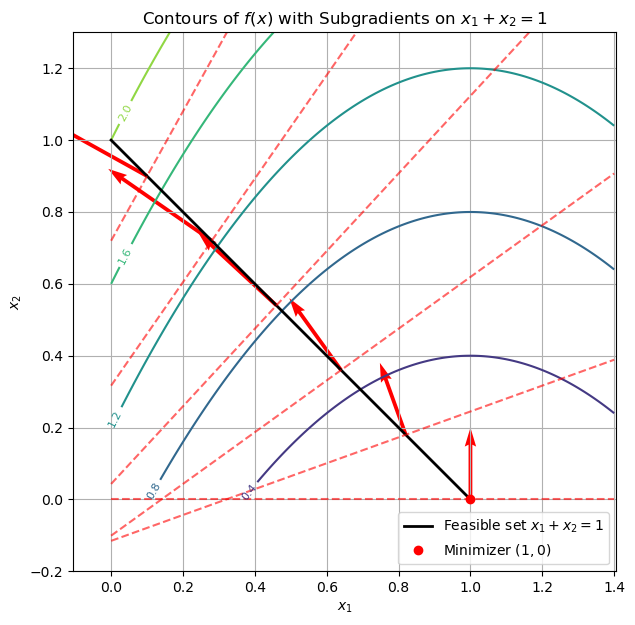

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition
def f(x1, x2):
    return (x1 - 1)**2 + x2

# Gradient of f
def grad_f(x1):
    return np.array([2 * (x1 - 1), 1])

# Points along the feasible line x1 + x2 = 1, with x1, x2 ≥ 0
feasible_points = [np.array([x1, 1 - x1]) for x1 in np.linspace(0.1, 1, 6)]

# Meshgrid around the line
x = np.linspace(0, 1.4, 300)
y = np.linspace(0, 1.4, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Plot setup
plt.figure(figsize=(7, 7))
contours = plt.contour(X, Y, Z, levels=6, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Plot feasible segment
x1_vals = np.linspace(0, 1, 200)
x2_vals = 1 - x1_vals
plt.plot(x1_vals, x2_vals, 'k-', lw=2, label='Feasible set $x_1 + x_2 = 1$')

# Plot subgradients and halfspaces
for pt in feasible_points:
    grad = grad_f(pt[0])
    # Draw subgradient
    plt.quiver(pt[0], pt[1], grad[0], grad[1], angles='xy', scale_units='xy', scale=5, width=0.007, color='red')
    
    # Draw supporting hyperplane: gradᵗ·(x - pt) = 0
    a, b = grad
    if np.abs(b) > 1e-6:
        xx = np.linspace(0, 1.4, 200)
        yy = (a * (pt[0] - xx) + b * pt[1]) / b
    else:
        yy = np.linspace(0, 1.4, 200)
        xx = np.ones_like(yy) * pt[0]
    plt.plot(xx, yy, 'r--', alpha=0.6)

# Mark the minimizer
plt.plot(1, 0, 'ro', label='Minimizer $(1,0)$')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Contours of $f(x)$ with Subgradients on $x_1 + x_2 = 1$')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim(0, 1.3)
plt.ylim(-0.2, 1.3)
plt.show()